In [8]:
# import python libraries

import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # for better plots
%matplotlib inline

In [9]:
# import csv file
data = pd.read_csv('Extended_Data_Web_Analytics_500k.csv')

data.shape

C:\Users\bhask\AppData\Local\Temp\ipykernel_27012\784856746.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Extended_Data_Web_Analytics_500k.csv')


(500032, 10)

In [10]:
# show top 5 rows of the dataset
data.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
3,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044


#### There are some errors in the first row of the dataset, which usually occurs while collecting the data from websites. The data starts from the second row, so handled it accordingly:


In [11]:
# clean headers and remove duplicated header rows
data.columns = data.iloc[0]
data = data[1:]
data.columns = [
    "channel_group",
    "datetime",
    "users",
    "sessions",
    "engaged_sessions",
    "avg_engagement_time",
    "engaged_sessions_per_user",
    "events_per_session",
    "engagement_rate",
    "event_count"
]
data.reset_index(drop=True, inplace=True)
data.head(3)

,channel_group,datetime,users,sessions,engaged_sessions,avg_engagement_time,engaged_sessions_per_user,events_per_session,engagement_rate,event_count
0,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
2,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069


In [12]:
# convert data types and handle errors
numeric_columns = [
    "users", "sessions", "engaged_sessions", "avg_engagement_time",
    "engaged_sessions_per_user", "events_per_session",
    "engagement_rate", "event_count"
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# drop rows with missing datetime (essential)
data.dropna(subset=["datetime"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490226 entries, 0 to 500030
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   channel_group              480532 non-null  object 
 1   datetime                   490226 non-null  object 
 2   users                      479961 non-null  float64
 3   sessions                   479877 non-null  float64
 4   engaged_sessions           479779 non-null  float64
 5   avg_engagement_time        479877 non-null  float64
 6   engaged_sessions_per_user  480019 non-null  float64
 7   events_per_session         480061 non-null  float64
 8   engagement_rate            479926 non-null  float64
 9   event_count                479906 non-null  float64
dtypes: float64(8), object(2)
memory usage: 41.1+ MB


In [13]:
# basic summary statistics
data.describe()

,users,sessions,engaged_sessions,avg_engagement_time,engaged_sessions_per_user,events_per_session,engagement_rate,event_count
count,479961.000000,479877.000000,479779.000000,479877.000000,480019.000000,480061.000000,479926.000000,479906.000000
mean,41.937080,51.207372,28.322048,66.872700,0.606154,4.677709,0.503177,242.317514
std,29.614639,36.969585,20.663221,129.306781,0.263940,2.816614,0.228336,184.553877
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,20.000000,24.000000,13.000000,32.097378,0.561404,3.750000,0.442623,103.000000
50%,42.000000,51.000000,27.000000,49.000000,0.666667,4.410256,0.545455,226.000000
75%,60.000000,71.000000,41.000000,71.537037,0.750000,5.208333,0.633333,339.000000
max,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000


In [14]:
### Converted the date column into an appropriate datetime format and group it for further analysis
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y%m%d%H')
data['users'] = pd.to_numeric(data['users'])
data['sessions'] = pd.to_numeric(data['sessions'])
# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['datetime'], as_index=False ).agg({'users': 'sum', 'sessions': 'sum'})
print(grouped_data.head())

ValueError: unconverted data remains when parsing with format "%Y%m%d%H": ".0", at position 64358. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

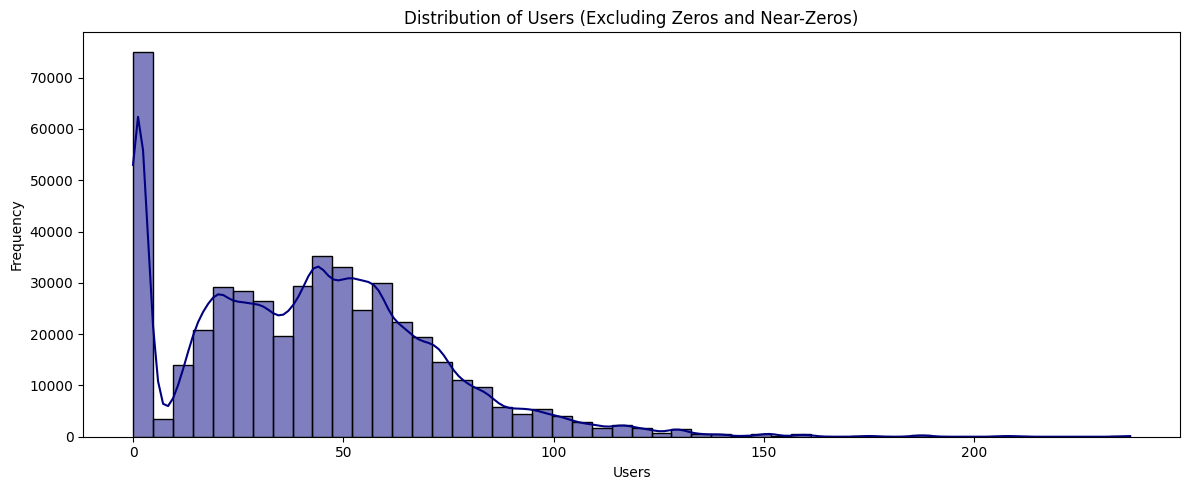

In [15]:
# Distribution of users excluding values at or near zero
filtered_users = data['users']

plt.figure(figsize=(12, 5))  # set figure size before plotting
sns.histplot(filtered_users, color='navy', bins=50, kde=True)

plt.title('Distribution of Users (Excluding Zeros and Near-Zeros)')
plt.xlabel('Users')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [16]:
print(data['users'].describe())

count    479961.000000
mean         41.937080
std          29.614639
min           0.000000
25%          20.000000
50%          42.000000
75%          60.000000
max         237.000000
Name: users, dtype: float64


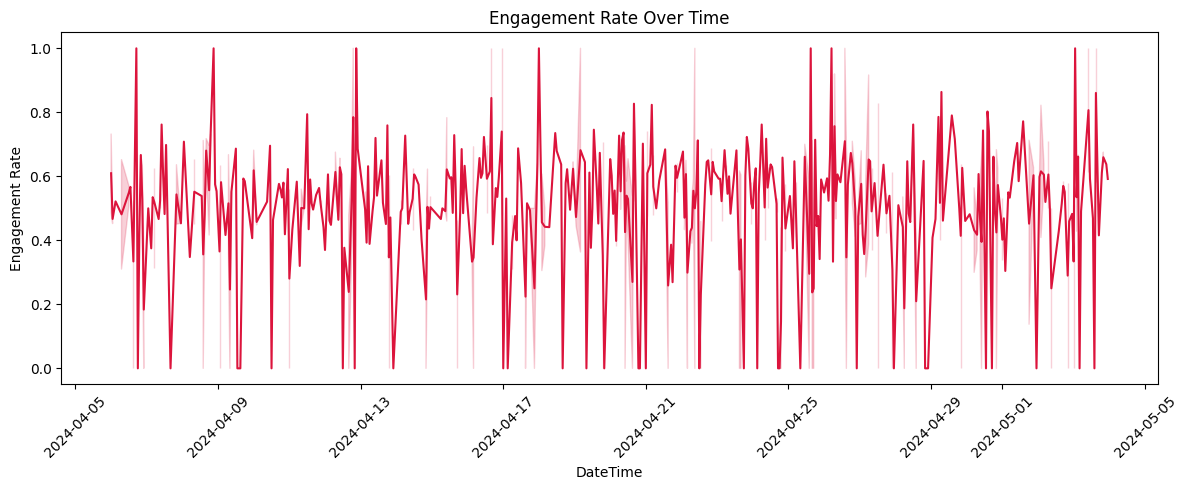

In [17]:
# Trend of engagement rate over time
sampled_data = data.sample(5000, random_state=1)
sampled_data['datetime'] = pd.to_datetime(sampled_data['datetime'], format='%Y%m%d%H', errors='coerce')
sampled_data = sampled_data.dropna(subset=['datetime'])

# Set figure size
plt.figure(figsize=(12, 5))

# Create lineplot
sns.lineplot(x='datetime', y='engagement_rate', data=sampled_data.sort_values('datetime'), color='crimson')

plt.title('Engagement Rate Over Time')
plt.xlabel('DateTime')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Correlation Heatmap

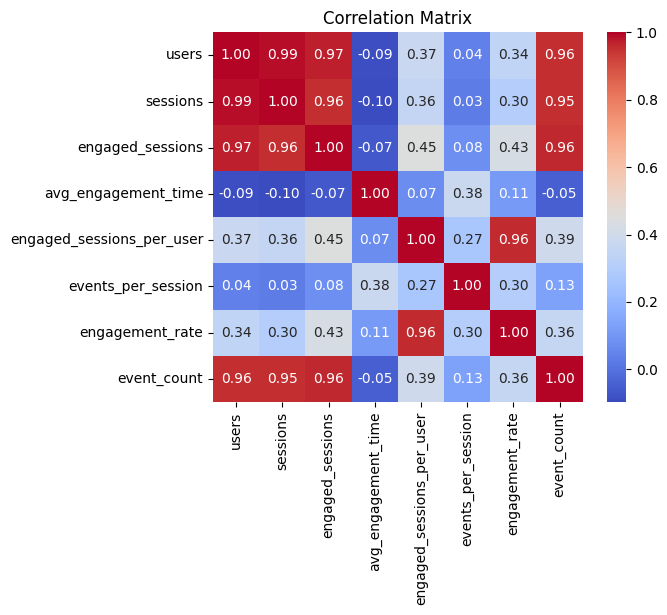

In [18]:
# Correlation heatmap
corr_matrix = data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()


## 📈 Session Trend Analysis

In [19]:
# Plotting the aggregated users and sessions over time with correct column names
plt.figure(figsize=(12, 5))
plt.plot(grouped_data.index, grouped_data['users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['sessions'], label='Sessions', color='crimson')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('DatetTime')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'grouped_data' is not defined

<Figure size 1200x500 with 0 Axes>

## ⏰ Analyze the Peak Traffic Hours

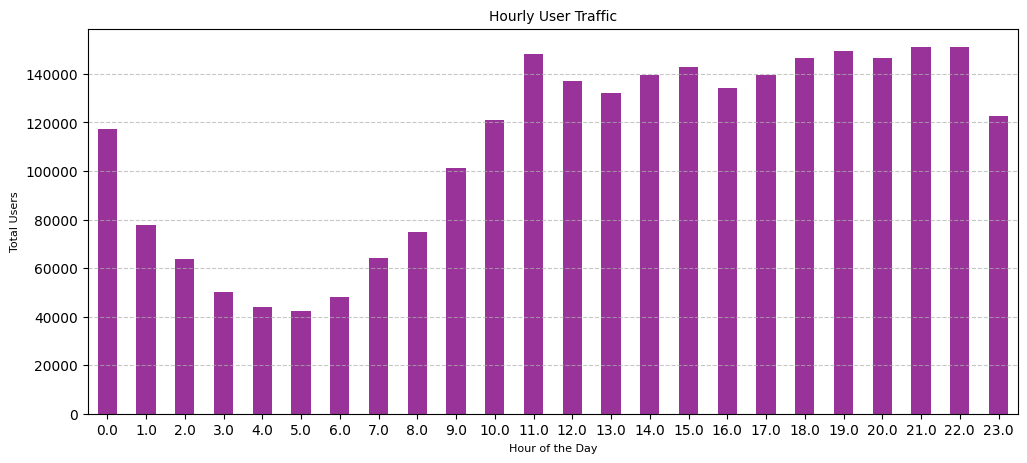

In [ ]:
# extract hour from datetime
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y%m%d%H', errors='coerce')
# Extract hour from Date_hour for analysis
data['hour'] = data['datetime'].dt.hour

# Group by hour and calculate the total number of users
hourly_traffic = data.groupby('hour')['users'].sum()


# Plotting the hourly traffic
plt.figure(figsize=(12, 5))
hourly_traffic.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Hourly User Traffic', fontsize=10)
plt.xlabel('Hour of the Day', fontsize=8)
plt.ylabel('Total Users', fontsize=8)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 🔍 User Engagement Analysis

In [ ]:
# prepare subset for analysis
engagement_data = data[['datetime', 'avg_engagement_time', 'engaged_sessions_per_user', 'events_per_session', 'engagement_rate']].copy()
engagement_data = engagement_data.dropna()

# convert datetime
engagement_data['datetime'] = pd.to_datetime(engagement_data['datetime'], errors='coerce')
engagement_data = engagement_data.dropna(subset=['datetime'])
engagement_data = engagement_data.sort_values('datetime').sample(5000, random_state=0)

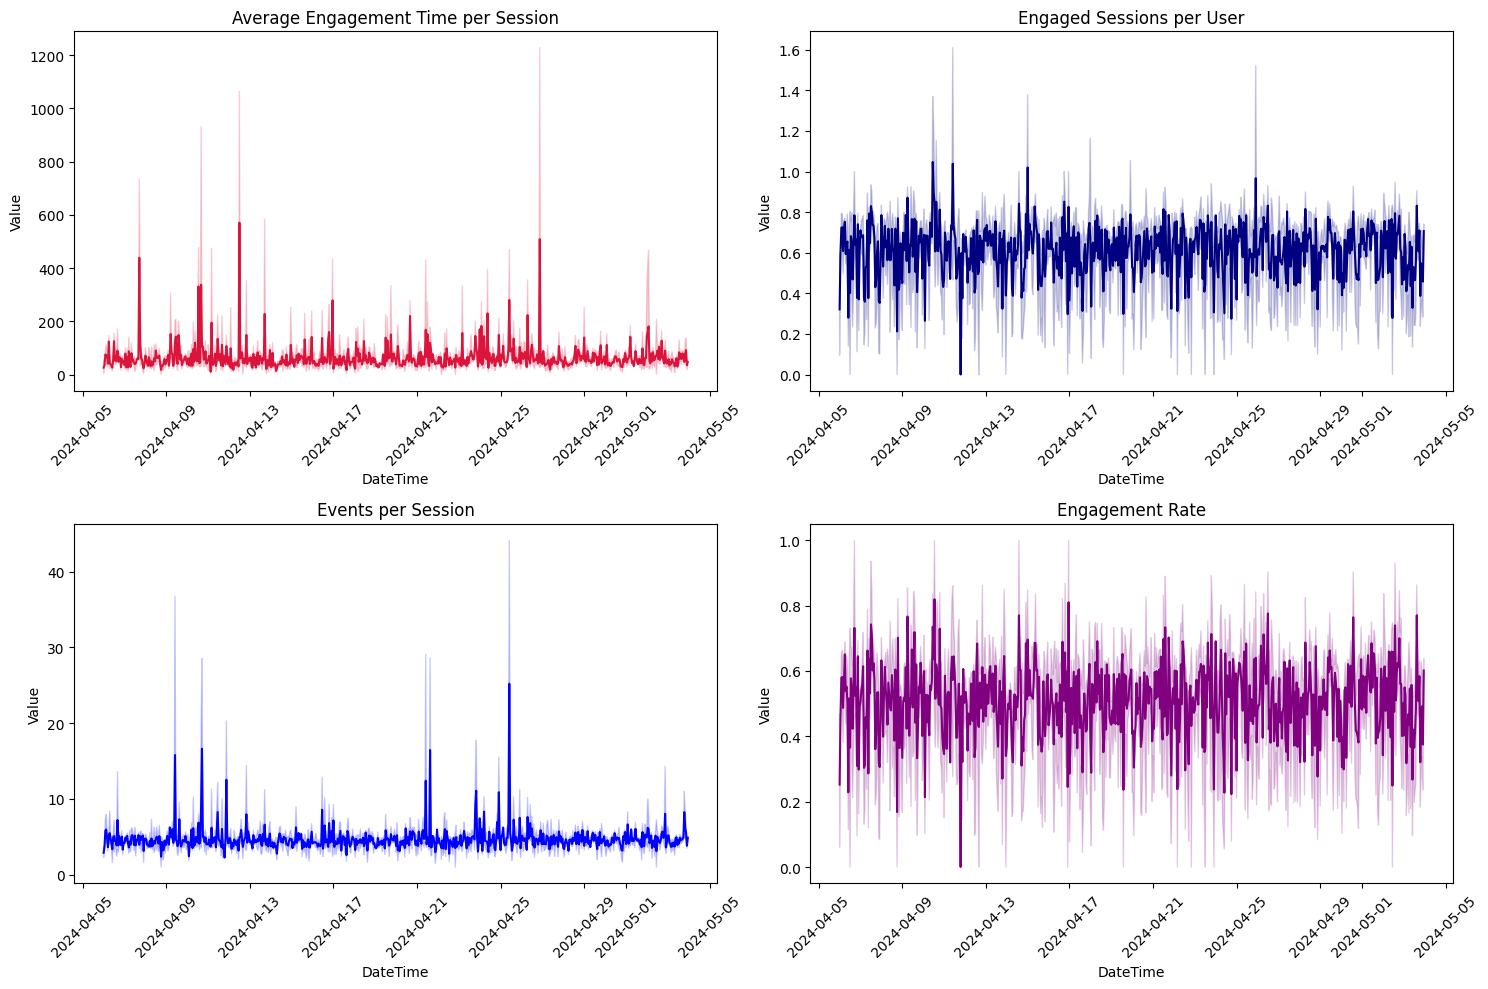

In [ ]:
# Plot metrics with specified colors
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x='datetime', y='avg_engagement_time', data=engagement_data, ax=axs[0, 0], color='crimson')
axs[0, 0].set_title('Average Engagement Time per Session')

sns.lineplot(x='datetime', y='engaged_sessions_per_user', data=engagement_data, ax=axs[0, 1], color='navy')
axs[0, 1].set_title('Engaged Sessions per User')

sns.lineplot(x='datetime', y='events_per_session', data=engagement_data, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('Events per Session')

sns.lineplot(x='datetime', y='engagement_rate', data=engagement_data, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Engagement Rate')

for ax in axs.flat:
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


##### 1._Average Engagement Time per Session:_ *The time spent per session shows fluctuations over the observed period. There are noticeable peaks, suggesting times when users were particularly engaged, potentially due to specific content releases or events.*

##### 2._Engaged Sessions per User:_ *This ratio fluctuates slightly but generally indicates that a good portion of sessions per user are engaged. Peaks in this metric could correspond to times when users find the content more relevant or engaging.*

##### 3._Events per Session:_ *The count of events per session remains relatively consistent but does show some variation. Peaks here could indicate more interactive content or features being used by visitors.*

##### 4._Engagement Rate:_ *The engagement rate over time shows how many sessions are considered engaged out of the total. There are some ups and downs which may relate to how different content resonates with users or how effective certain user acquisition channels are.*

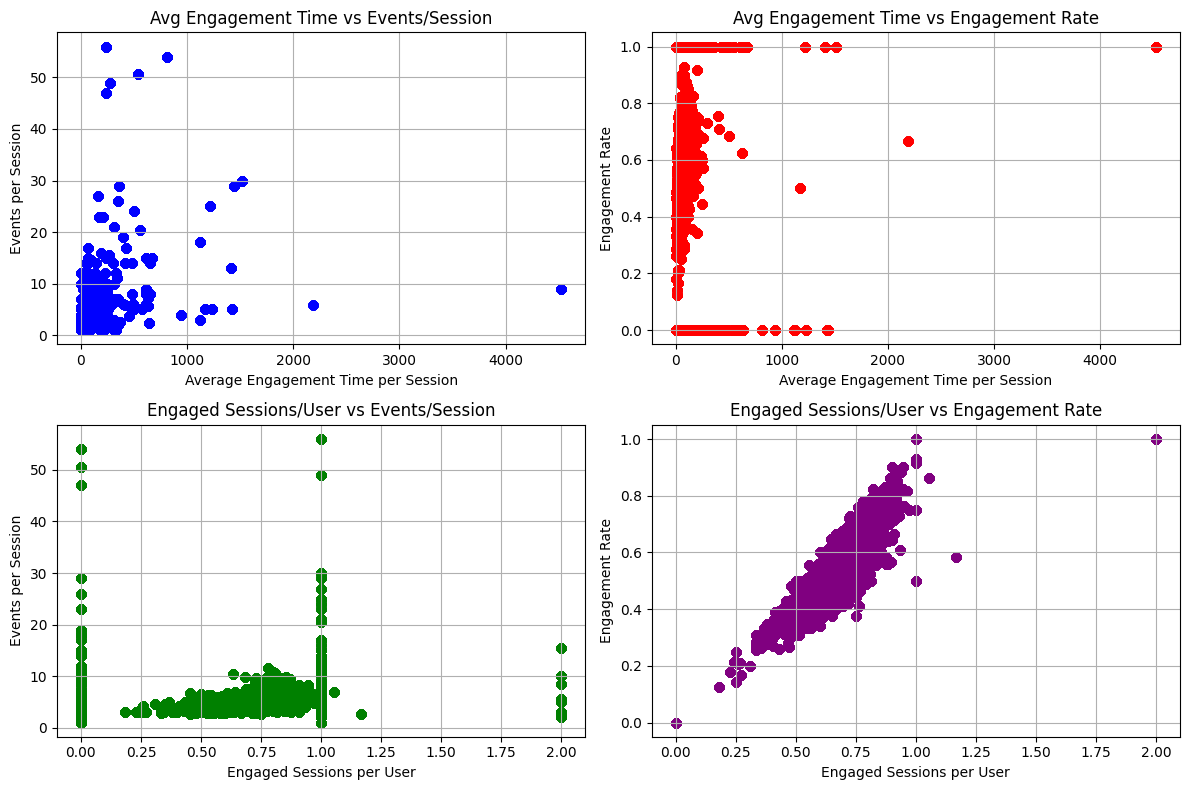

In [22]:
# generate scatter plots between key engagement metrics
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['avg_engagement_time'], data['events_per_session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['avg_engagement_time'], data['engagement_rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['engaged_sessions_per_user'], data['events_per_session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['engaged_sessions_per_user'], data['engagement_rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


### *Here’s what we can analyze from the above scatter plots:*
##### 1. **Average Engagement Time vs Events per Session:** There appears to be a concentration of data points at lower average engagement times with a wide range of events per session. As the average engagement time increases, the number of events per session tends to cluster more narrowly around lower values.
##### 2. **Average Engagement Time vs Engagement Rate:** There is a clear trend where sessions with very low engagement times have a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values.
##### 3. **Engaged Sessions per User vs Events per Session:** Most data points cluster at lower values for both metrics, with few users having a high number of engaged sessions or events per session.
##### 4. **Engaged Sessions per User vs Engagement Rate:** There is a strong positive correlation between engaged sessions per user and engagement rate, especially noticeable at higher values of engaged sessions per user.


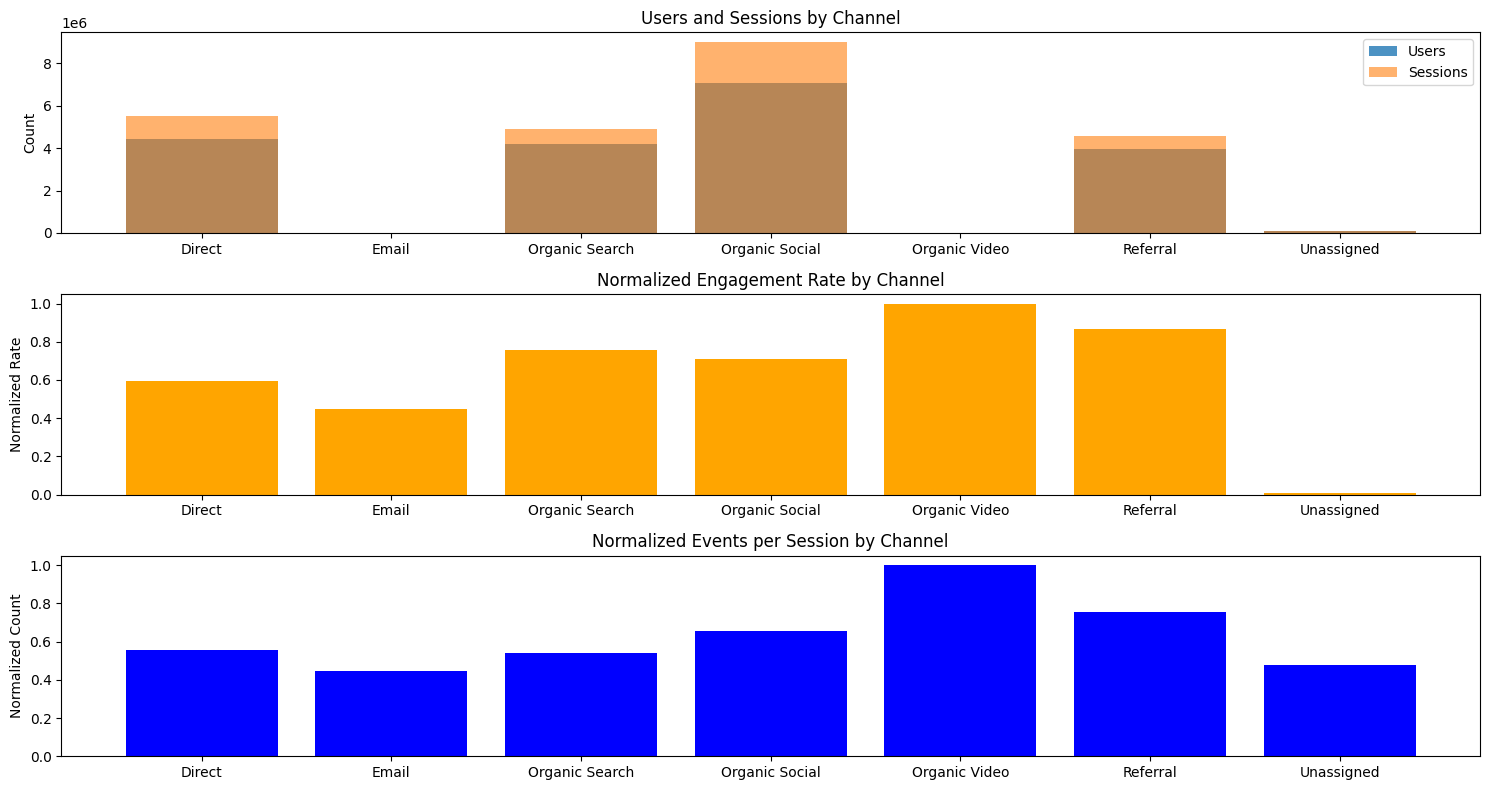

In [23]:
# Channel Performance Analysis

# Group data by channel and aggregate necessary metrics
channel_performance = data.groupby('channel_group').agg({
    'users': 'sum',
    'sessions': 'sum',
    'engaged_sessions': 'sum',
    'engagement_rate': 'mean',
    'events_per_session': 'mean'
})

# Normalize engagement rate and events per session for comparison
channel_performance['normalized_engagement_rate'] = (
    channel_performance['engagement_rate'] / channel_performance['engagement_rate'].max()
)
channel_performance['normalized_events_per_session'] = (
    channel_performance['events_per_session'] / channel_performance['events_per_session'].max()
)

# Plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(15, 8))

# Users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# Normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['normalized_engagement_rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# Normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['normalized_events_per_session'], color='blue')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()




#  Final Deliverables: ## 
- Full EDA of detaset with 5lacs+ entries:
  - Session trend analysis
  - Peak hour traffic visualization
  - User engagement metrics and analysis
  - Engagement-based scatter plots and observations
  - Channel performance analysis with normalized comparisons
- Each section contains clear, structured observations using markdown cells.


# Observations:
## 1. Session Trend Analysis
The session trends show a mix of fluctuations across the extended dataset. We observe several spikes in user sessions corresponding to potential campaign activity or content updates. The trend remains seasonally varied, with evident peaks and troughs across months.

## 2. Peak Traffic Hours
The histogram reveals the highest traffic consistently occurs between 10 AM to 2 PM. There are also secondary peaks in the evening around 7 PM to 9 PM. This suggests user engagement is highest during mid-morning and post-work hours.

## 3. User Engagement Analysis
1. **Average Engagement Time per Session** shows spikes on certain days, likely linked to new content or promotions.
2. **Engaged Sessions per User** indicate users are frequently returning and spending time meaningfully, with occasional engagement spikes.
3. **Events per Session** reflects stable interaction, with peaks likely due to feature launches or interactive sessions.
4. **Engagement Rate** shows variability tied to user interest and source quality, indicating some channels yield higher-quality traffic.


## 4. Correlation Analysis from Scatter Plots
1. **Average Engagement Time vs Events per Session:** Concentration of data at low engagement times but wide variability in events; higher engagement tends to stabilize event counts.
2. **Average Engagement Time vs Engagement Rate:** A positive trend shows longer sessions generally lead to higher engagement rates.
3. **Engaged Sessions per User vs Events per Session:** Low-metric clusters dominate, but power users drive spikes in session interactivity.
4. **Engaged Sessions per User vs Engagement Rate:** Clear positive correlation — as users engage more, their engagement rate consistently improves.


## 5. Channel Performance Analysis
Direct and organic search channels bring in the most users and sessions. However, **Email** and **Referral** channels show higher engagement rates and events per session, suggesting they attract more relevant or interested visitors. Normalized metrics confirm the quality of traffic varies significantly across sources.




##  Conclusion:
This extended analysis provides a much deeper and scalable understanding of user behavior across sessions, channels, and engagement metrics. The presence of data imperfections makes the insights more robust and closer to real-world conditions. This allows for better-informed optimization strategies for content, marketing, and user engagement campaigns.
